In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

**1.1** $x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$

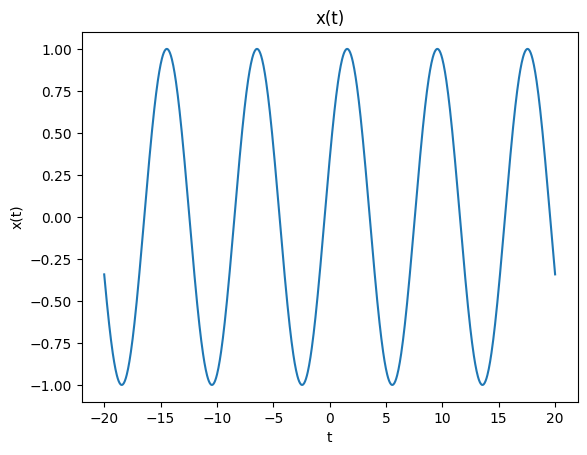

In [2]:
t = np.linspace(-20,20,1000)

xt = np.sin((np.pi*t)/4 + np.pi/9)

plt.plot(t,xt)
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# reference from Chatgpt
# import numpy as np
# import matplotlib.pyplot as plt

# # กำหนดช่วงเวลา t
# t = np.linspace(0, 20, 500)  # 0 ถึง 20 จำนวน 500 จุด

# # แปลง 20 องศาเป็นเรเดียน
# phase_shift = np.deg2rad(20)  # 20 องศา = 20 * pi/180

# # คำนวณ x(t)
# x = np.sin((np.pi / 4) * t + phase_shift)

# # วาดกราฟ
# plt.plot(t, x)
# plt.title(r'$x(t) = \sin\left(\frac{\pi}{4}t + 20^\circ\right)$')
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.grid(True)
# plt.show()


**1.2
$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$**

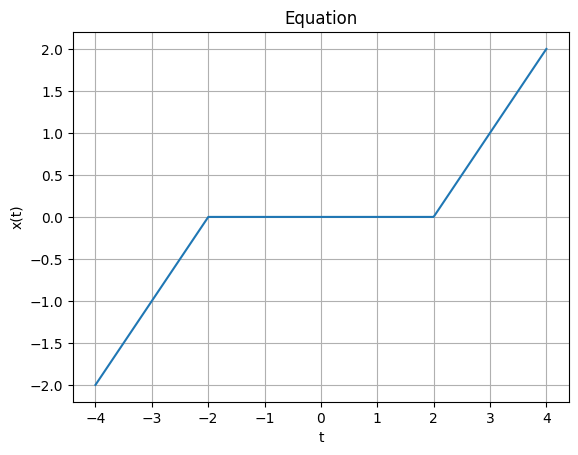

In [3]:
x_1_2 = np.linspace(-4,4,1000)
condition = [x_1_2 <= -2,( x_1_2 > -2) & (x_1_2 <= 2), x_1_2 > 2]
xt = np.piecewise(x_1_2,condition,
 [lambda t:t+2, lambda t:0, lambda t: t-2]
)
plt.plot(x_1_2,xt)
plt.grid(True)
plt.title("Equation")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# inpsired from chatgpt to using peicewaise instead plot each domain

**1.3 $x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$**

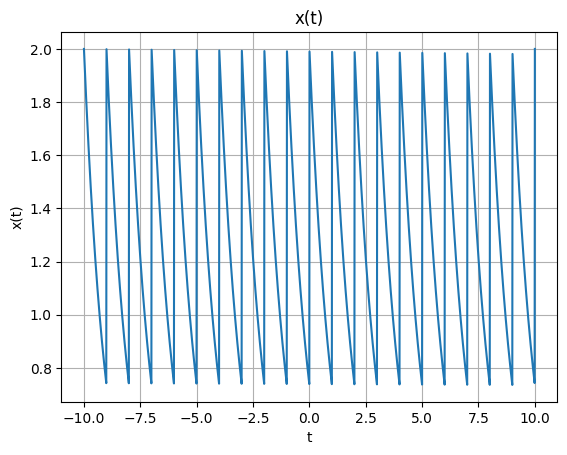

In [4]:
x1 = np.linspace(-10,10,2000)

# the problem said this signal have perodic be 1 so T = 1 thus signal will repeat every 1 second

t = x1 % 1
yt = 2*np.exp(-t)
plt.plot(x1,yt)
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

**1.4 $x(t) = u(t) + 5u(t-1) -2u(t-2)$**

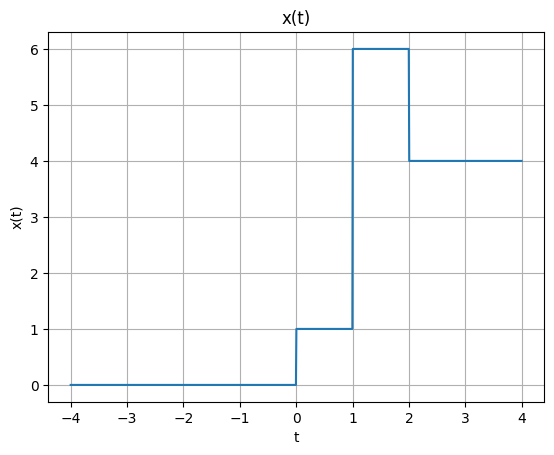

In [6]:
x_1_4 = np.linspace(-4,4,1000)

condition = [x_1_4 <= 0, (x_1_4 > 0) & (x_1_4 <= 1), (x_1_4 > 1) & (x_1_4 <= 2), (x_1_4 > 2)]

function = [lambda t: 0, lambda t: 1, lambda t: 6, lambda t: 4]

xt = np.piecewise(x_1_4, condition, function)

plt.plot(x_1_4,xt)
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

**1.5 $x(t) = r(t) - r(t-1) - u(t-2)$**

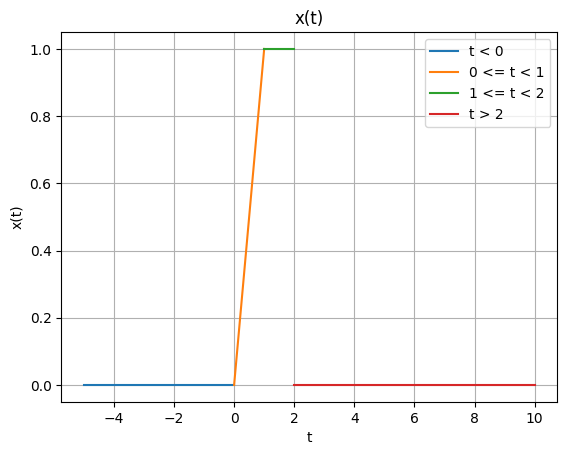

In [7]:
x1 = np.linspace(-5,0,500)
x2 = np.linspace(0,1,500)
x3 = np.linspace(1,2,500)
x4 = np.linspace(2,10,500)

y1 = [0 for i in range(500)] # chat บอกให้ใช้ np.zeroz หรือ np.ones แทน จะเร็วกว่า
y2 = list(x2)
y3 = [1 for i in range(500)] # because r(t) - r(t-1) = 1
y4 = [0 for i in range(500)] # because 1 - u(t-2) = 0 when t > 2

plt.plot(x1,y1,label="t < 0")
plt.plot(x2,y2,label="0 <= t < 1")
plt.plot(x3,y3,label="1 <= t < 2")
plt.plot(x4,y4,label="t > 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("x(t)")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()


**ข้อ 2 Determine whether each of following signals is periodic, and if so, find its period.**  
1.
$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$

2.
$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.
$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $

In [26]:
import math as mh
from fractions import Fraction
def lcm_fraction(a,b):
  f1 = Fraction(a).limit_denominator(1000)
  f2 = Fraction(b).limit_denominator(1000)
  return mh.lcm(f1.numerator,f2.numerator)/mh.gcd(f1.denominator, f2.denominator)
# chatgpt said can find lcm of two Fraction number a/b and c/d by lcm(a,c)/gcd(b,d)

In [27]:
# 1.
T1 = 2*np.pi/(np.pi/3)
T2 = 2*np.pi/(np.pi*8/3)
print("its period: ", lcm_fraction(T1,T2))

its period:  6.0


In [28]:
# 2.
T1 = 2*np.pi/(7*np.pi/6)
T2 = 2*np.pi/(5*np.pi/6)
print(T1)
print(T2)
print("its period: ", lcm_fraction(T1,T2))

1.7142857142857144
2.4
its period:  12.0


In [29]:
# 3.
print("isn't periodic because second term isn't have period")

isn't periodic because second term isn't have period


**3. Determine whether the following signals are power or energy signals or neither. Justify your answers**

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$

วิธีทำ คือ E เข้าใกล้ตี้จะมีค่าเท่ากับ 0 , P เข้าใกล้ตี้จะเท่ากับ infinity
ไป integrate ตาม form เอา

**ข้อ 4**

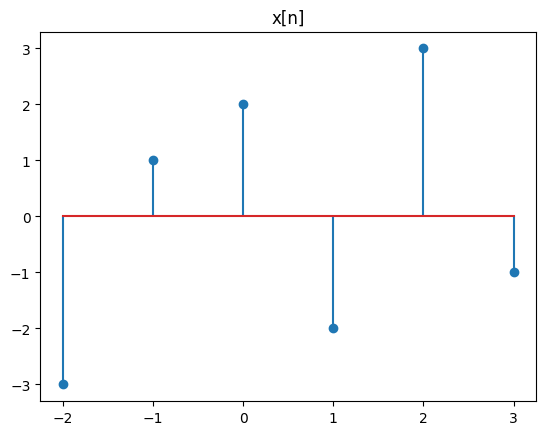

In [8]:
# x[n]
t = np.arange(-2,4)
x_t = np.array([-3,1,2,-2,3,-1])
plt.stem(t, x_t)
plt.title('x[n]')
plt.show()

**4.1 $x[2-n] $**

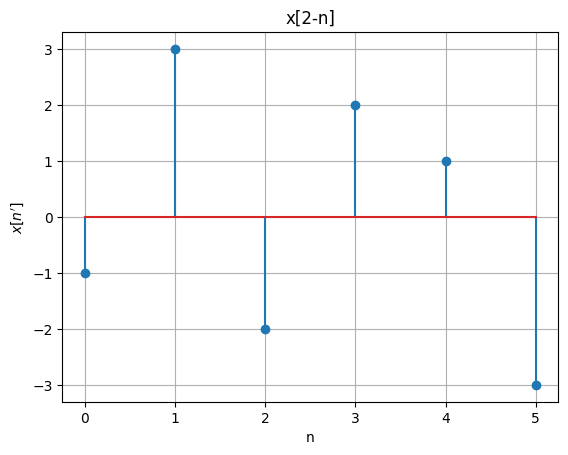

In [9]:
# start with changing form to x[-(n-2)] and it interpret reflect x[n] then shift to the right 2 point

t1 = np.array(t+2)

xt1 = np.array(x_t[::-1])
# print(xt1)
plt.stem(t1,xt1)
plt.title("x[2-n]")
plt.grid(True)
plt.xlabel("n")
plt.ylabel(r"$x\left[n'\right]$")
plt.show()

**4.2 $x[3n-4] $**

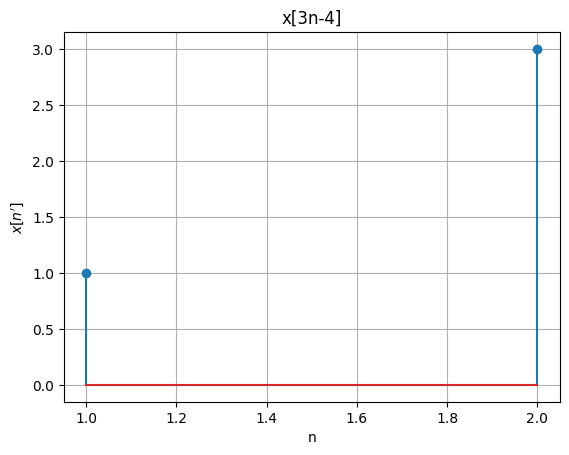

In [40]:
# compresed signal by 1/3 and shift signal to right 4/3
t2 = t/(3)
t2 = t2 + 4/3
xt2 = []
for i in range(len(t2)):
  if t2[i]%1 == 0:
    xt2.append(x_t[i])
t2 = [t for t in t2 if t%1 == 0]
plt.stem(t2, xt2)
plt.title("x[3n-4]")
plt.grid(True)
plt.xlabel("n")
plt.ylabel(r"$x\left[n'\right]$")
plt.show()

**4.3 $x\left[ \frac{2}{3}n+1 \right]  $**

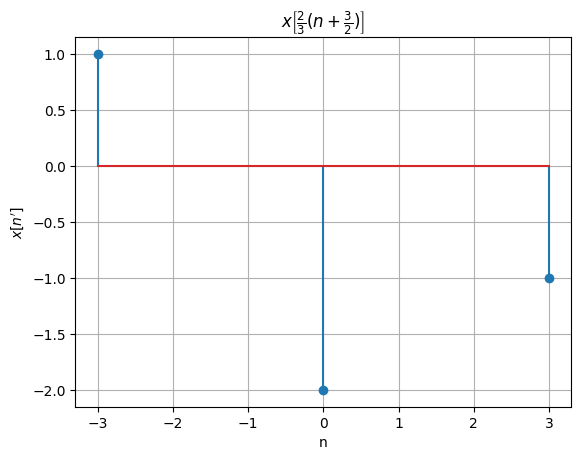

In [37]:
# start with changing form to x[2/3(n+(3/2))] and it scale signal by 2/3 then shift left to 3/2

t2 = t/(2/3)
xt3 = []
t2 = t2 - 1.5
for i in range(len(t2)):
  if t2[i]%1 == 0:
    xt3.append(x_t[i])
t2 = [t for t in t2 if t%1 == 0]
# print(t2, xt2)
plt.stem(t2,xt3)
plt.title(r"$x\left[\frac{2}{3}(n + \frac{3}{2})\right]$")
plt.xlabel("n")
plt.ylabel(r"$x\left[n'\right]$")
plt.grid(True)
plt.show()

**4.4 $x\left[-\frac{n+8}{4} \right] $**

-16.0
-12.0
-8.0
-4.0
0.0
4.0


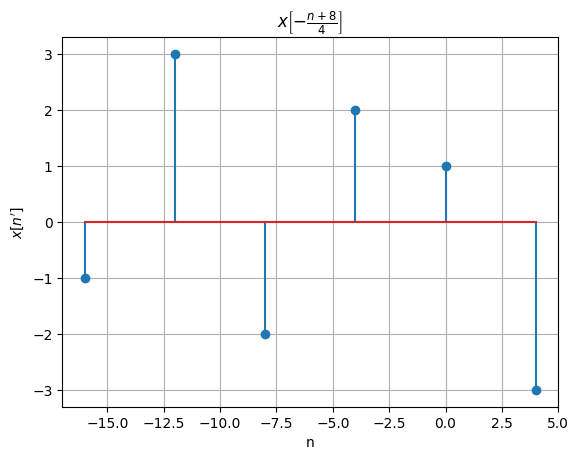

In [45]:
# reflect signal and scale signal by 1/4 then shift left to 8
xt4 = x_t[::-1]
t4 = t/(1/4) - 8
xt4_1 = []
for i in range(len(t4)):
  if t4[i]%1 == 0:
    xt4_1.append(xt4[i])
t4 = [t for t in t4 if t%1 == 0]
plt.stem(t4,xt4_1)
plt.title(r"$x\left[-\frac{n+8}{4}\right]$")
plt.xlabel("n")
plt.ylabel(r"$x\left[n'\right]$")
plt.grid(True)
plt.show()

**4.5 $x[n^3] $**

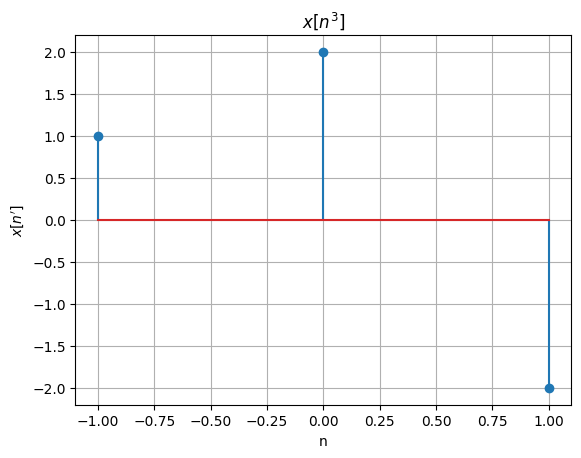

In [11]:
# start with interpret signal, this signal in domain -2 to 3 thus n^3 can't out of domain

t3 = np.arange(-1,2) # because n > 1 or n < -1 will out of domain
xt3 = x_t[1:4]
# print(xt3)

plt.stem(t3,xt3)
plt.title("$x[n^3] $")
plt.xlabel("n")
plt.ylabel(r"$x\left[n'\right]$")
plt.grid(True)
plt.show()

**ข้อ 9**

**9.1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt$**

วิธีทำ จาก delta function ที่ t0 = 1 และ 1 อยู่ในช่วงของการ integrate ทำให้ ผลลัพธ์ของการ integrate นี้เท่ากับ  $\left( \frac{2}{3}t-\frac{3}{2} \right)$ โดย t = 1

จะได้ $\left( \frac{2}{3}*1-\frac{3}{2} \right)$




In [12]:
x = 2/3 - 3/2
print(f"คำตอบเท่ากับ: {x:.2f}")

คำตอบเท่ากับ: -0.83


**9.3 $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$**  

วิธีทำ จาก delta function ที่ t0 = $\frac{3}{2}$ และ  $\frac{3}{2}$  ไม่อยู่ในช่วงของการ integrate ทำให้ ผลลัพธ์ของการ integrate นี้เท่ากับ  0

In [13]:
x = 0
print(f"คำตอบเท่ากับ: {x:.2f}")

คำตอบเท่ากับ: 0.00
